In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for making graphs 
import seaborn as sns# for plotting

plt.style.use('ggplot')

# pd.set_option('max_column')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

In [3]:
# Prepare Data

df = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [4]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [7]:
# Clean the data
# Changing ID to an object since each ID is Distinct this is our primary key
# changing Activity date to date and time from object since when they inputted the data in excel it was stored as an object and this will not return dates for us
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [8]:
# Observations Total Distance and Tracked Distance seem to have the same values, Logged activites is 0 throughout the table
# Check if the two columns are the same I will subrtact the two from each other in a new column and values returned should be 0 

df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']


In [9]:
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [10]:
# Total Distance and Tracker Distance appear to have different values in 15 rows so while it appears to be the same they are actually different, Logged Activities Distance Also has values when total Distance and Tracker Distance are different
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [11]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'distance_diff'],
      dtype='object')

In [12]:
df.rename(columns ={'ActivityDate' : 'Activity_Date', 'TotalSteps': 'Total_Steps', 'TotalDistance' : 'Total_Distance', 'TrackerDistance': 'Tracker_Distance',
       'LoggedActivitiesDistance' : 'Logged_Activities_Distance', 'VeryActiveDistance' : 'Very_Active_Distance',
       'ModeratelyActiveDistance': 'Moderately_Active_Distance', 'LightActiveDistance' : 'Light_Active_Distance',
       'SedentaryActiveDistance' : 'Sedentary_Active_Distance', 'VeryActiveMinutes' : 'Very_Active_Minutes', 'FairlyActiveMinutes': 'Fairly_Active_Minutes',
       'LightlyActiveMinutes': 'Lightly_Active_Minutes', 'SedentaryMinutes' : 'Sedentary_Minutes',
       'distance_diff' : 'Distance_Diff'}, inplace = True)

df.columns

Index(['Id', 'Activity_Date', 'Total_Steps', 'Total_Distance',
       'Tracker_Distance', 'Logged_Activities_Distance',
       'Very_Active_Distance', 'Moderately_Active_Distance',
       'Light_Active_Distance', 'Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Calories',
       'Distance_Diff'],
      dtype='object')

In [13]:
# Creating new columns that tell us the day of the week using the datetime function day_name(), create a new column with the number of days of the week using the function weekday

In [14]:
Day_of_Week = df['Activity_Date'].dt.day_name()
df['Day_of_Week'] = Day_of_Week
df['N_Day_Of_Week'] = df['Activity_Date'].dt.weekday # 0 represents monday, 6 represents sunday
Total_Minutes = df['Very_Active_Minutes'] + df['Lightly_Active_Minutes'] + df['Sedentary_Minutes']
df['Total_Minutes'] = Total_Minutes

In [15]:
df.columns

Index(['Id', 'Activity_Date', 'Total_Steps', 'Total_Distance',
       'Tracker_Distance', 'Logged_Activities_Distance',
       'Very_Active_Distance', 'Moderately_Active_Distance',
       'Light_Active_Distance', 'Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Calories',
       'Distance_Diff', 'Day_of_Week', 'N_Day_Of_Week', 'Total_Minutes'],
      dtype='object')

In [16]:
# Checking empty cells and null values with the function isna().sum()

print('Total number of null values are: ')
print(df.isna().sum())

Total number of null values are: 
Id                            0
Activity_Date                 0
Total_Steps                   0
Total_Distance                0
Tracker_Distance              0
Logged_Activities_Distance    0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Calories                      0
Distance_Diff                 0
Day_of_Week                   0
N_Day_Of_Week                 0
Total_Minutes                 0
dtype: int64


In [17]:
# Check for duplicate entries with duplicated().sum()

print( ' Total number of duplicates are: ', df.duplicated().sum())

# We can see there are no null values 

 Total number of duplicates are:  0


In [18]:
# Create a new a new subset

df = df[['Id','Activity_Date','Total_Steps','Total_Distance',
       #'Tracker_Distance', 'Logged_Activities_Distance',
       #'Very_Active_Distance', 'Moderately_Active_Distance',
       #'Light_Active_Distance','Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes','Sedentary_Minutes', 'Calories',
       'Distance_Diff', 'Day_of_Week','N_Day_Of_Week','Total_Minutes'
       ]].copy()

In [19]:
df.head()

,Id,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories,Distance_Diff,Day_of_Week,N_Day_Of_Week,Total_Minutes
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,0.0,Tuesday,1,1081
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,0.0,Wednesday,2,1014
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,0.0,Thursday,3,1429
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,0.0,Friday,4,964
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,0.0,Saturday,5,1030


In [20]:
# I will sort physical activity based on MedicineNet researchers
# Sedenatry = less then 5000 steps
# Active: more than 5000 steps and less 11000then 
# Very Active more than 11000 on average

# device usafe will follow these arguments
# Low use less then 8 h per day
#Normal use between 8 to 16h a day
# High Usage is more then 16hand up to 24 hours


In [21]:
# Check for unique value 
df['Id'].unique()

array(['1503960366', '1624580081', '1644430081', '1844505072',
       '1927972279', '2022484408', '2026352035', '2320127002',
       '2347167796', '2873212765', '3372868164', '3977333714',
       '4020332650', '4057192912', '4319703577', '4388161847',
       '4445114986', '4558609924', '4702921684', '5553957443',
       '5577150313', '6117666160', '6290855005', '6775888955',
       '6962181067', '7007744171', '7086361926', '8053475328',
       '8253242879', '8378563200', '8583815059', '8792009665',
       '8877689391'], dtype=object)

In [22]:
df['Activity_Date'].value_counts()

Activity_Date
2016-04-12    33
2016-04-14    33
2016-04-15    33
2016-04-13    33
2016-04-23    32
2016-04-29    32
2016-04-28    32
2016-04-26    32
2016-04-25    32
2016-04-24    32
2016-04-27    32
2016-04-22    32
2016-04-20    32
2016-04-19    32
2016-04-18    32
2016-04-17    32
2016-04-16    32
2016-04-21    32
2016-04-30    31
2016-05-01    30
2016-05-05    29
2016-05-07    29
2016-05-06    29
2016-05-03    29
2016-05-04    29
2016-05-02    29
2016-05-08    27
2016-05-09    27
2016-05-10    26
2016-05-11    24
2016-05-12    21
Name: count, dtype: int64

In [23]:
Id_Grp = df.groupby(['Id'])
Id_Avg_Step = Id_Grp['Total_Steps'].mean().sort_values(ascending=False)
Id_Avg_Step = Id_Avg_Step.to_frame()

conditions = [
        (Id_Avg_Step <= 5000),
        (Id_Avg_Step > 5000) & (Id_Avg_Step < 11000),
        (Id_Avg_Step >= 11000)
]
values = ('Sedentary', 'Active', 'Very_Active')
Id_Avg_Step['Activty_Level'] = np.select(conditions,values)
Id_Activity_Level = Id_Avg_Step['Activty_Level']
df['Activity_Level'] = [Id_Activity_Level[c] for c in df['Id']]

In [24]:
df.head(3)

,Id,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories,Distance_Diff,Day_of_Week,N_Day_Of_Week,Total_Minutes,Activity_Level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,0.0,Tuesday,1,1081,Very_Active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,0.0,Wednesday,2,1014,Very_Active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,0.0,Thursday,3,1429,Very_Active


In [25]:
#Checks

In [26]:
#Count the number of unique Ids
df['Id'].nunique()

33

In [27]:
#Check if there is data for the full month
df.Activity_Date.nunique()

31

In [28]:
#Check how many days eachs Id has logged activity
df.Id.value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [29]:
df.describe()

,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories,Distance_Diff,N_Day_Of_Week,Total_Minutes
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,0.014351,2.918085,1205.188298
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,0.000000,1.000000,976.750000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,0.000000,3.000000,1386.500000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,0.000000,5.000000,1438.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,1.830000,6.000000,1440.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,0.124458,1.942379,268.551892


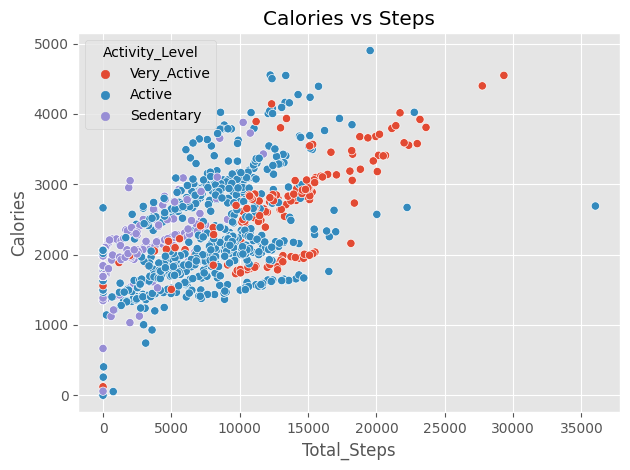

In [30]:
# Share
# Correlation between steps and calories burned

ax = sns.scatterplot(x='Total_Steps', y ='Calories',data=df, hue=df['Activity_Level'])

plt.title('Calories vs Steps')

plt.tight_layout()
plt.show()

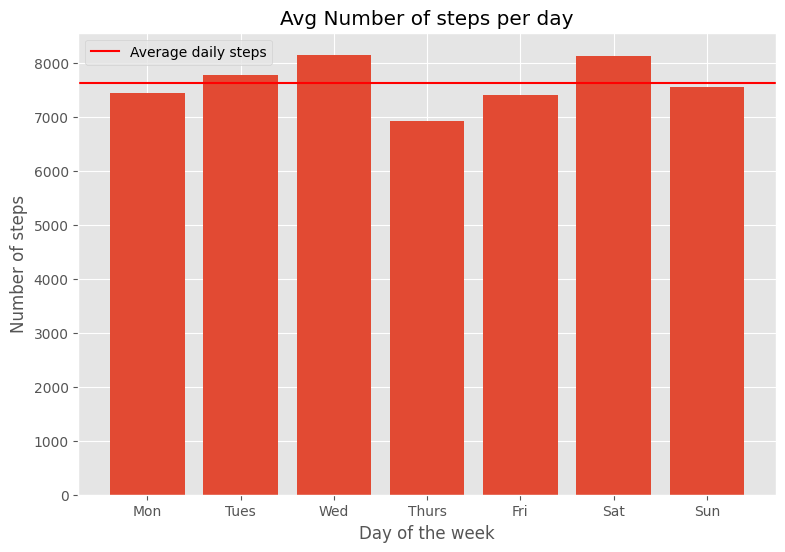

In [31]:
# What is the average number of steps per day
Day_of_Week = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
fig, ax =plt.subplots(1,1,figsize=(9,6))
Day_Group = df.groupby(['Day_of_Week'])
Avg_Daily_Steps = Day_Group['Total_Steps'].mean()
Avg_Steps = df['Total_Steps'].mean()

plt.bar(Avg_Daily_Steps.index,Avg_Daily_Steps)

ax.set_xticks(range(len(Day_of_Week)))
ax.set_xticklabels(Day_of_Week)

ax.axhline(y=Avg_Daily_Steps.mean(),color='red', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')


plt.legend()
plt.show()

In [32]:
# On Tuesday, Wednesday and Saturday users had higher then average steps overall with thursday being the lowest average.
# With this information we can see that users are most active at the start of the week and then drop down until the weekend where pysical activity peaks

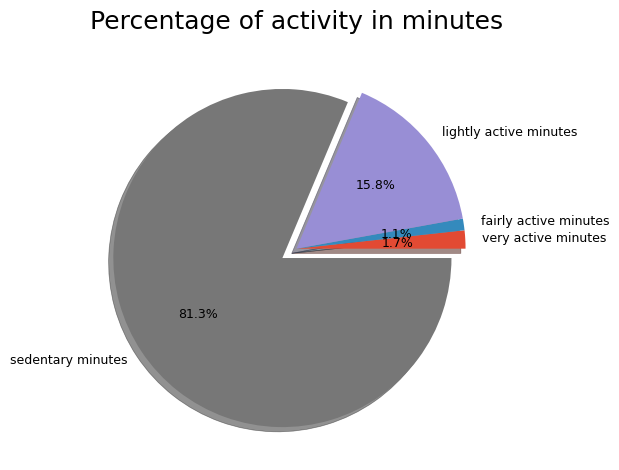

In [38]:
# Percentage of Activity in Minutes

Very_Active_Mins = df['Very_Active_Minutes'].sum() 
Fairly_Active_Mins = df['Fairly_Active_Minutes'].sum()
Lightly_Active_Mins = df['Lightly_Active_Minutes'].sum()
Sedentary_Mins = df['Sedentary_Minutes'].sum()

slices = [Very_Active_Mins,Fairly_Active_Mins,Lightly_Active_Mins,Sedentary_Mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',textprops=dict(size=9), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()


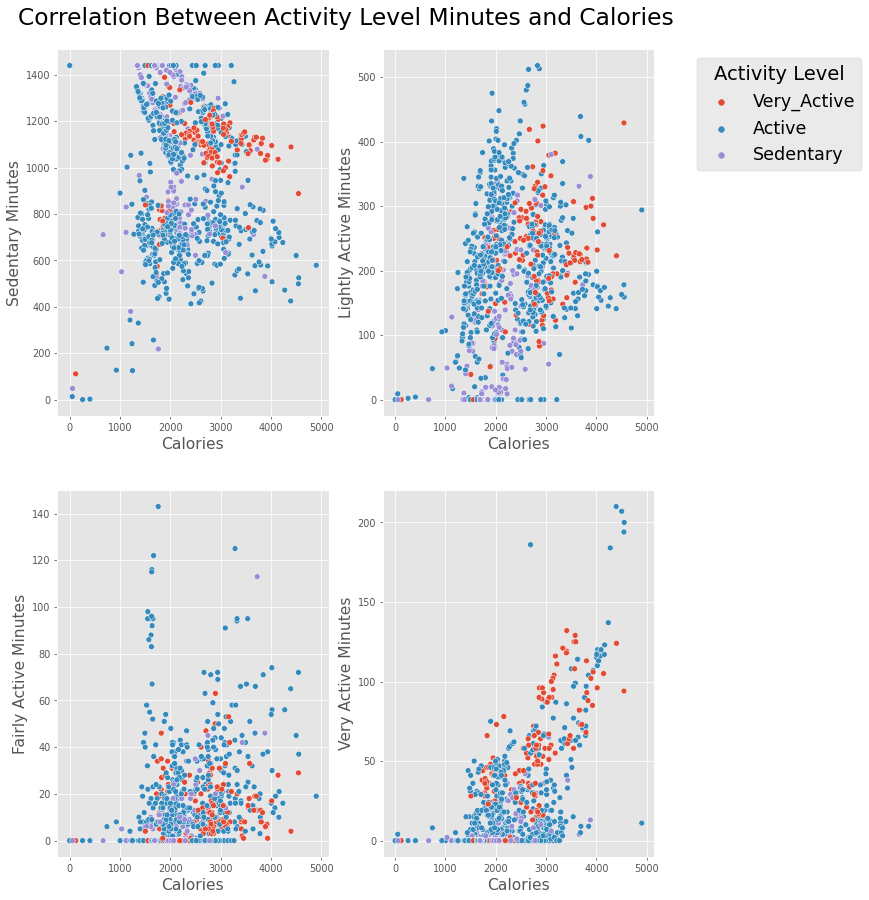

In [39]:
# his pie chart shows that the users are in a sedentary state of activity most of the time, a sixth of the time doing light activity and only 2% of the time being active doing proper excercise.
import matplotlib.pyplot as plt
import seaborn as sns

N_Day_of_Week = [0, 1, 2, 3, 4, 5, 6]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 15), dpi=70)

sns.scatterplot(data=df, x='Calories', y='Sedentary_Minutes', hue='Activity_Level', ax=axes[0, 0], legend=False)
axes[0, 0].set_xlabel('Calories', fontsize=16)
axes[0, 0].set_ylabel('Sedentary Minutes', fontsize=16)

sns.scatterplot(data=df, x='Calories', y='Lightly_Active_Minutes', hue='Activity_Level', ax=axes[0, 1], legend=False)
axes[0, 1].set_xlabel('Calories', fontsize=16)
axes[0, 1].set_ylabel('Lightly Active Minutes', fontsize=16)

sns.scatterplot(data=df, x='Calories', y='Fairly_Active_Minutes', hue='Activity_Level', ax=axes[1, 0], legend=False)
axes[1, 0].set_xlabel('Calories', fontsize=16)
axes[1, 0].set_ylabel('Fairly Active Minutes', fontsize=16)

sns.scatterplot(data=df, x='Calories', y='Very_Active_Minutes', hue='Activity_Level', ax=axes[1, 1])
axes[1, 1].set_xlabel('Calories', fontsize=16)
axes[1, 1].set_ylabel('Very Active Minutes', fontsize=16)

plt.legend(title='Activity Level', title_fontsize=20, bbox_to_anchor=(1.8, 2.2), fontsize=18, frameon=True, scatterpoints=1)
fig.suptitle('Correlation Between Activity Level Minutes and Calories', x=0.5, y=0.92, fontsize=24)
plt.show()


In [ ]:
#Suggestions
#Competition with friends where the app shows your list of friends and how many steps they've taken as well as their calories burned
# Goals and reminders so users can hit their target daily steps to meet for amount of calories they want to burn